
# Project: Investigate a Movies Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project I am analyzing TMDb Dataset from Kaggle. The purpose of this notebook is to pose questions, wrangle the data by cleaning it, explore and built intuations, find patterns, then draw conclusions and predictions, and communicate to answer the questions. Thereby covering the whole data analysis process. 



## Questions to Answer
<ul>
<li><a href="#que1">Highest paid Actor in recent ten years?</a></li>
<li><a href="#que2">What is the correlation between budget, revenue, profit, populatity and votes? </a></li>
<li><a href="#que3">What is the trend of Movies over the years?</a></li>
</ul>

<a id='wrangling'></a>
## Data Wrangling

>Data Wrangling is carried out in three steps
    >1. In this step i have acquired the data from kaggle and imported it in jupyter notebook.
    >2. Access the data and identified the quality of data.
    >3. Data cleaning.

## General Properties

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#import csv
df = pd.read_csv('tmdb-movies.csv')
print("TMDB Dataset contains (Rows,Columns) : ",df.shape)
print("First few rows of dataset are :")

df.head()

sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(11.7, 8.27)})

TMDB Dataset contains (Rows,Columns) :  (10866, 21)
First few rows of dataset are :


In [3]:
#Check Non-null Count and Data type of each coloum
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
#Quick look at the statistical values of the Dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


## Observations

**Observations regarding the quality of data**   
><ul>
    <li>There are multiple columns that are not relevent and can be removed.</li>
    <li>Some of the rows contains "Nan" values.</li>
    <li>Some rows contains Duplicate values.</li>
    <li>Plenty of colomns contains values seperated by an "|".</li>
    <li>Columns like budget_adj and revenue_adj are in float.</li>
</ul>



## Data Cleaning
**Following are the steps carried out to clean the data**
><ul>
    <li>Drop not required columns for this analysis.</li>
    <li>Delete rows with NaN values.</li>
    <li>Delete Duplicate values.</li>
    <li>Create Seperate columns for each values seperated by an "|".</li>
    <li>Change format of budget_adj and revenue_adj to int from float.</li>
</ul>

In [5]:
#Dropping columns not required for analysis
df.drop(['id','imdb_id','homepage','tagline','keywords','overview','vote_count'], axis=1, inplace=True);
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,6.5,2015,137999939.3,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,7.1,2015,137999939.3,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,6.3,2015,101199955.5,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,7.5,2015,183999919.0,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,7.3,2015,174799923.1,1.385749e+09


In [6]:
#check 0 values
print("Count of 0 values in columns:\n\n ")
df.isin([0]).sum()

Count of 0 values in columns:

 


popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                       0
director                   0
runtime                   31
genres                     0
production_companies       0
release_date               0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

In [7]:
#check NaN values
print("Count of NaN values in columns:\n\n ")
df.isna().sum()

Count of NaN values in columns:

 


popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:

#replace 0 values with NaN
df['budget'] = df['budget'].replace(0,np.NAN)
df['budget_adj'] = df['budget_adj'].replace(0,np.NAN)
df['revenue'] = df['revenue'].replace(0,np.NAN)
df['revenue_adj'] = df['revenue_adj'].replace(0,np.NAN)
#Fill 0 values with min values
df.fillna(df.mean(), inplace=True)
df.isna().sum()


popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [9]:
#Delete rows with NaN values
df['runtime'] = df['runtime'].replace(0,np.NAN)
df.isna().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                   31
genres                    23
production_companies    1030
release_date               0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [10]:
df.dropna(inplace=True)
print("After Removing NaN (Rows,Columns) : ",df.shape)

After Removing NaN (Rows,Columns) :  (9760, 14)


In [11]:
#check duplicate count
print("Duplicates are indicated by True:\n ")
(df.duplicated()).value_counts()

Duplicates are indicated by True:
 


False    9759
True        1
dtype: int64

In [12]:
#Delete duplicates
df.drop_duplicates(inplace = True)
print("After Removing Duplicate Values (Rows,Columns) : ",df.shape)

After Removing Duplicate Values (Rows,Columns) :  (9759, 14)


In [13]:
#check NaN values again
print("After cleaning, count of NaN values in columns:\n\n ")
df.isna().sum()

After cleaning, count of NaN values in columns:

 


popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [14]:
#split by an '|', into as many columns as needed.
df_c = (df['cast'].str.split('|', expand=True).rename(columns=lambda x: f"cast_{x+1}"))
df_d = (df['director'].str.split('|', expand=True).rename(columns=lambda x: f"director_{x+1}"))
df_g = (df['genres'].str.split('|', expand=True).rename(columns=lambda x: f"genres_{x+1}"))
df_p = (df['production_companies'].str.split('|', expand=True).rename(columns=lambda x: f"production_companies_{x+1}"))

df = df.join([df_c, df_d, df_g, df_p])


In [15]:
#function to convert float to int
def float_to_int(number):
    return np.int(number)

# Applying the function ot columns budget_adj and revenue_adj 
df['budget_adj'] = df['budget_adj'].apply(float_to_int)
df['revenue_adj'] = df['revenue_adj'].apply(float_to_int)

# Creating profit and adjusted profit columns
df['profit'] = df['revenue'] - df['budget']
df['profit_adj'] = df['revenue_adj'] - df['budget_adj']

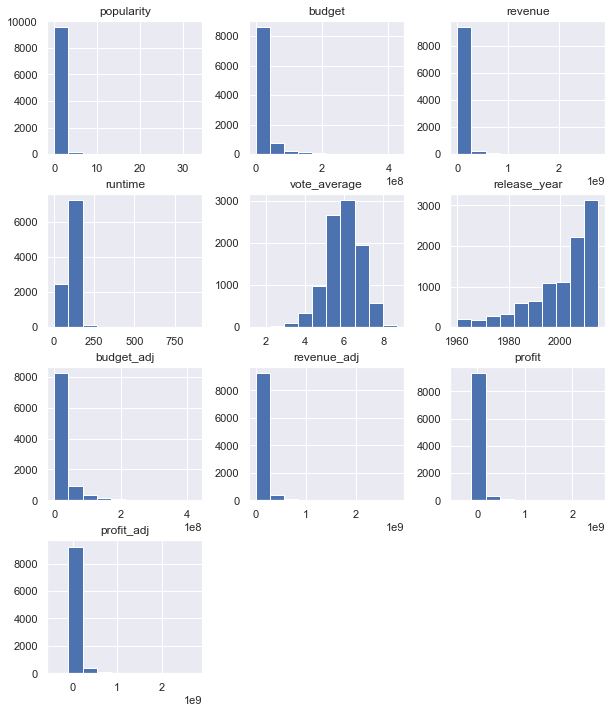

In [16]:
df.hist(figsize=(10,12));

<a id='eda'></a>
## Exploratory Data Analysis
>In this step I am addressing the questions posed on this dataset.

<a id='que1'></a>
### Research Question 1 : Highest paid actor in recent 10 year?

<Figure size 936x661.6 with 0 Axes>

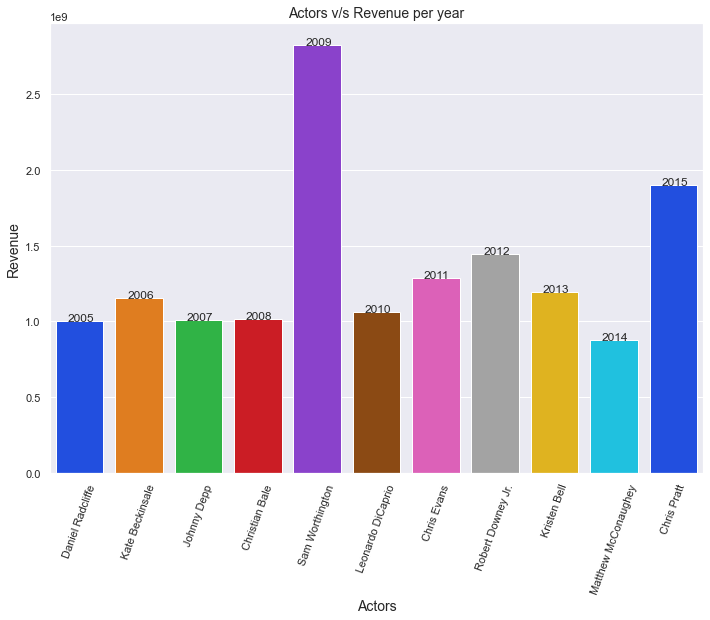

<Figure size 936x661.6 with 0 Axes>

In [17]:
df_recent_years = df[df['release_year'] >= 2005]
df_max_rev = df_recent_years.groupby(['release_year']).agg(revenue_max=('revenue_adj', max),actor=('cast_1', 'first'),
year=('release_year',min))

high_revenue = df_max_rev['revenue_max'].to_numpy()
actors = df_max_rev['actor'].to_numpy()
year = df_max_rev['year'].to_numpy()

g = sns.barplot(data=df_max_rev,x = actors, y = high_revenue, palette='bright');
plt.xticks(rotation=70)
#plt.tight_layout()
i = 0

for p in g.patches:
        x = p.get_x() + 0.2
        y = p.get_y() + p.get_height()
        g.annotate(year[i], (x, y))
        i +=1
# Graph 
plt.xlabel('Actors', fontsize = 14)
plt.ylabel('Revenue', fontsize = 14)
plt.title('Actors v/s Revenue per year', fontsize = 14)
plt.figure(figsize=(11.7, 8.27),dpi=80)



**Highest paid Actor in recent 10 years is Sam Worthington**

<a id='que2'></a>
### Research Question 2 : What is the correlation between budget, revenue, profit, populatity and votes?

In [18]:
df_invest = pd.DataFrame(df_recent_years,columns=['profit_adj','revenue_adj','budget_adj','popularity','vote_average'])
cor = df_invest.corr()
cor

,profit_adj,revenue_adj,budget_adj,popularity,vote_average
profit_adj,1.000000,0.975609,0.494650,0.495458,0.091541
revenue_adj,0.975609,1.000000,0.673365,0.534712,0.108058
budget_adj,0.494650,0.673365,1.000000,0.448336,0.119515
popularity,0.495458,0.534712,0.448336,1.000000,0.230577
vote_average,0.091541,0.108058,0.119515,0.230577,1.000000


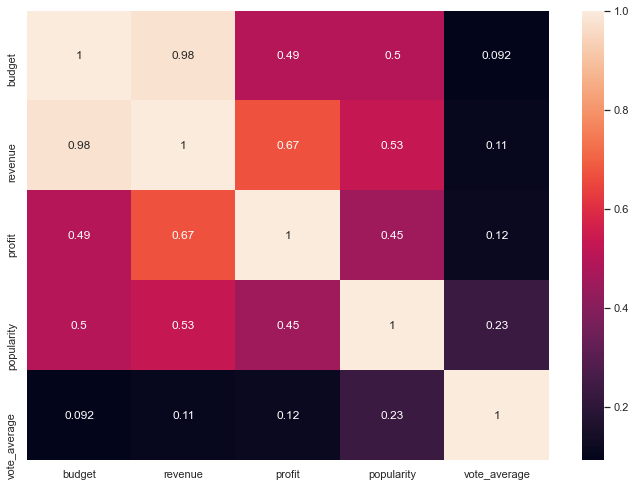

In [19]:
x_axis_labels = ['budget','revenue','profit','popularity','vote_average'] # labels for x-axis
y_axis_labels = ['budget','revenue','profit','popularity','vote_average'] # labels for y-axis
sns.heatmap(cor, annot=True,xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.show()

**The values shows the positive linear correlations between budget, revenue, profit, popularity and votes.** 

<a id='que3'></a>
### Research Question 3 : What is the trend of Movies over the years?

<Figure size 3000x1500 with 0 Axes>

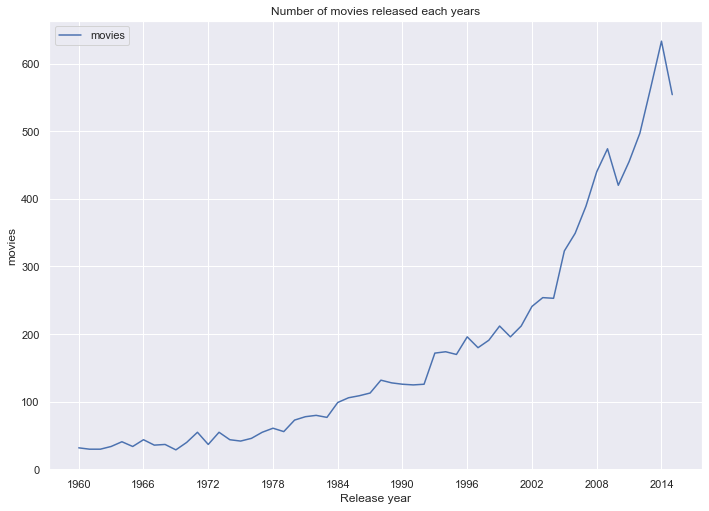

<Figure size 3000x1500 with 0 Axes>

In [20]:
df_movies_count = df.groupby(['release_year']).agg(movies=('original_title', 'count'))


df_movies_count.plot(xticks = np.arange(1960,2016,6))

plt.title("Number of movies released each years")
plt.xlabel('Release year')
plt.ylabel('movies')
plt.figure(figsize=(20, 10),dpi=150)

<a id='conclusions'></a>
## Conclusions

**Reserch Question 1** : As per the bar plot highest paid Actor in recent 10 years is Sam Worthington.
Chris Pratt is the second highest paid actor and Robert Downey jr. is the third highest paid actor.

**Reserch Question 2** : The correlation between budget, revenue, profit, popularity and votes is shown by correlation matrix.
The values shows the positive linear correlations between the rows and columns.
Also the heatmap visualizes the correlations 

**Reserch Question 3** : Over the years the amount of movies has increased remarkebly.
2014 being the year with the maximum count of movies released, where as 1960 is the year with minimum amount of movies.

>**Limitations**:
>In this report, I have analyzed some profitability factors and general trends of movies from 1960 to 2015. Findings are tentative and not verified by the principles of statistics and machine learning.
I have used TMBD Movies dataset for our analysis and worked with popularity, revenue and runtime. My analysis is limited to only the provided dataset. 
There is no normalization or exchange rate or currency conversion is considered during this analysis and our analysis is limited to the numerical values of revenue.
Dropping missing or Null values from variables of our interest might skew our analysis and could show unintentional bias towards the relationship being analyzed. etc

>**Refrences**
https://pandas.pydata.org
https://stackoverflow.com
https://github.com